## Business Model

Let's first review the $AKT business model. 

The $AKT token is the native token of the Akash Network, a decentralized cloud computing platform. The Akash Network is a decentralized cloud computing platform that enables users to buy and sell cloud computing resources. The platform is built on top of the Cosmos SDK and uses the Tendermint consensus algorithm. The $AKT token is used to pay for cloud computing resources on the platform. Users can stake $AKT tokens to become validators on the network and earn rewards for validating transactions. The $AKT token can also be used to participate in governance decisions on the network.

$AKT Utility:
- Used to pay for cloud computing resources, though you can also use noble $USDC
- Stake to become a validator
- Participate in governance
- Incentivize network participants

https://akash.network/token/#akt-features

$AKT Tokenomics:

Max Supply: 344,134,860 $AKT

Circulating Supply: 247,727,390 $AKT

https://docs.google.com/spreadsheets/d/1MUULetp59lgNq0z4ckVI51QdtMGvqtKOW8wRfX5R8yY/edit?gid=2130333819#gid=2130333819

In [1]:
import os
import requests
import json
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt


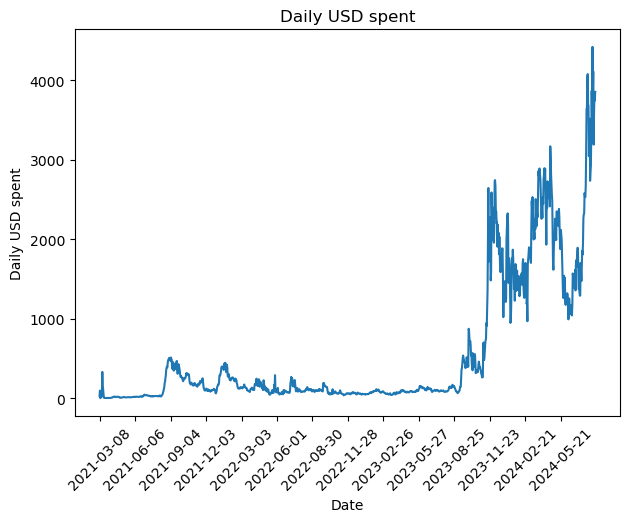

In [2]:
# Load data
data_url = "https://api.cloudmos.io/v1/graph-data/dailyUUsdSpent"
data_json = requests.get(data_url).json()
data_df = pd.DataFrame(data_json["snapshots"])

# Convert date to datetime
data_df["date"] = pd.to_datetime(data_df["date"], errors='coerce')
data_df["value"] = data_df["value"].astype(float) / 1000000

# Ensure no missing dates after conversion
data_df = data_df.dropna(subset=["date"])

# Plot the daily USD spent
plt.plot(data_df["date"], data_df["value"])
plt.xlabel("Date")
plt.ylabel("Daily USD spent")
plt.title("Daily USD spent")
plt.tight_layout()
# only show every 90th date and format it to be more readable
plt.xticks(data_df["date"][::90], rotation=45)
plt.show()

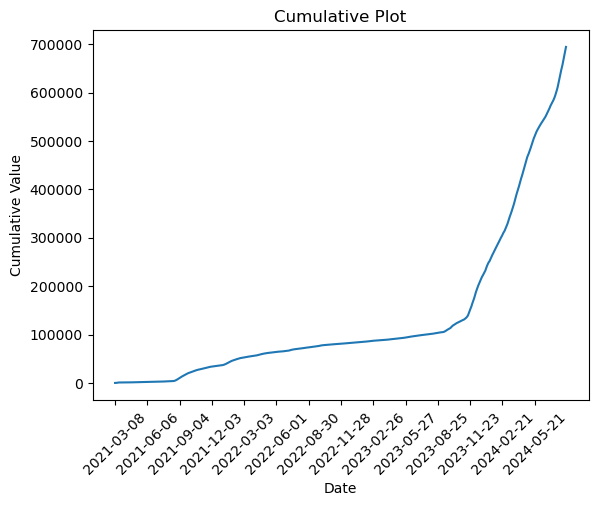

In [3]:
data_df['cumulative_value'] = data_df['value'].cumsum()
plt.plot(data_df['date'], data_df['cumulative_value'])
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Plot')
plt.xticks(data_df['date'][::90], rotation=45)
plt.show()

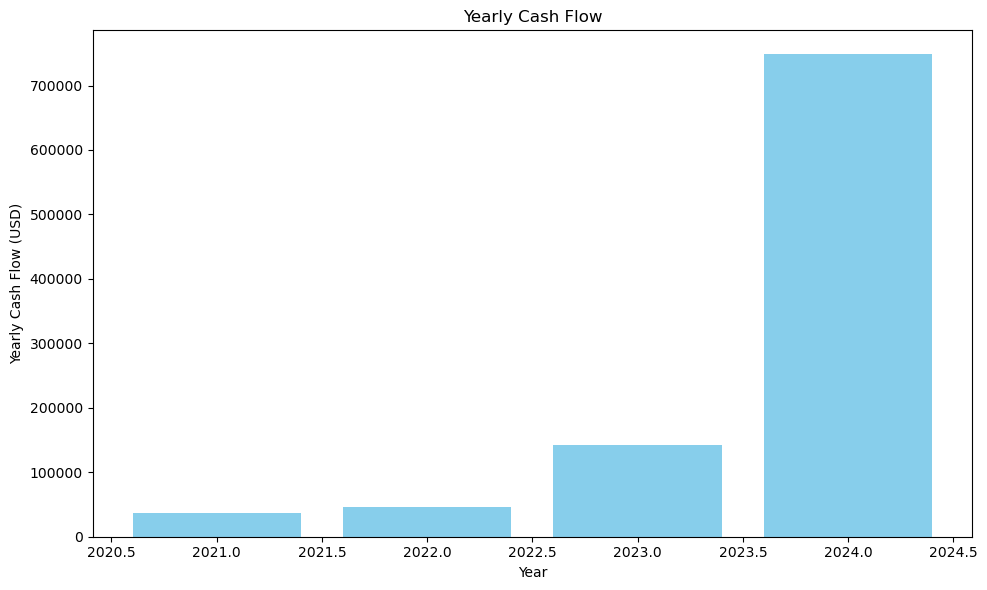

Projected Future Cash Flows: [1496394.694202236, 2992789.388404472, 5985578.776808944, 11971157.553617887, 23942315.107235774, 47884630.21447155, 95769260.4289431, 191538520.8578862, 383077041.7157724, 766154083.4315448]
Present Values of Future Cash Flows: [1360358.8129111235, 2473379.659838406, 4497053.92697892, 8176461.685416217, 14866293.97348403, 27029625.406334598, 49144773.466062896, 89354133.57465981, 162462061.04483598, 295385565.5360654]
Total Value (DCF): $654.7497 million


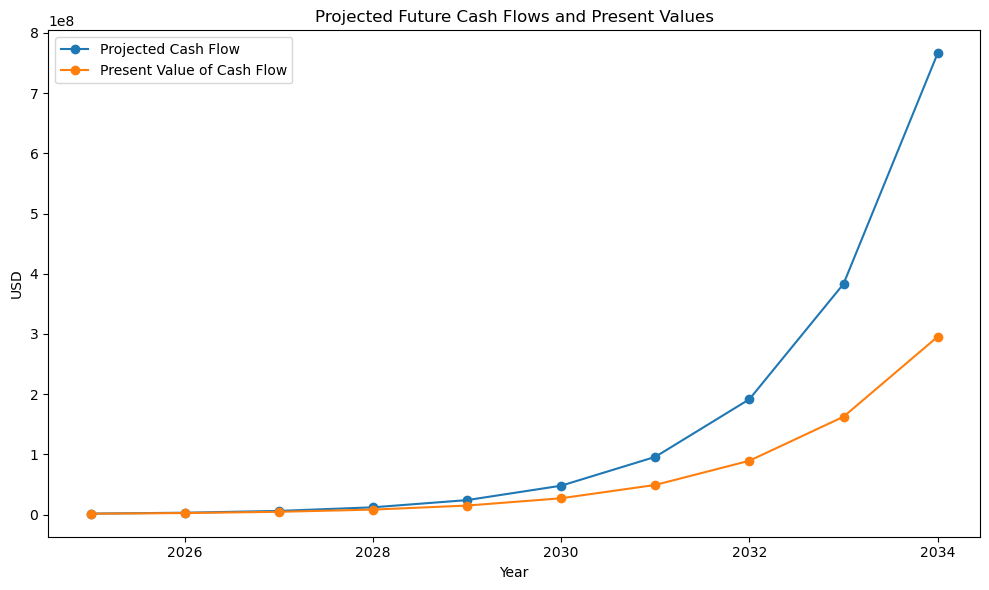

In [4]:
# Calculate yearly cash flow
data_df['year'] = data_df['date'].dt.year
yearly_cash_flow = data_df.groupby('year')['value'].sum().reset_index()
yearly_cash_flow.columns = ['year', 'cash_flow']

# Calculate the average daily cash flow for 2024
current_year = 2024
current_year_data = data_df[data_df['year'] == current_year]
average_daily_cash_flow_2024 = current_year_data['value'].mean()
days_elapsed_2024 = current_year_data['date'].nunique()

# Calculate the remaining days in 2024
total_days_2024 = 366 if (current_year % 4 == 0 and (current_year % 100 != 0 or current_year % 400 == 0)) else 365
remaining_days_2024 = total_days_2024 - days_elapsed_2024

# Estimate the cash flow for the remaining days of 2024
estimated_cash_flow_remaining_2024 = average_daily_cash_flow_2024 * remaining_days_2024

# Add the estimated cash flow to the existing cash flow for 2024
total_cash_flow_2024 = current_year_data['value'].sum() + estimated_cash_flow_remaining_2024

# Update the yearly cash flow for 2024
yearly_cash_flow.loc[yearly_cash_flow['year'] == current_year, 'cash_flow'] = total_cash_flow_2024

# If 2024 is not already in the yearly_cash_flow, add it
if current_year not in yearly_cash_flow['year'].values:
    yearly_cash_flow = yearly_cash_flow.append({'year': current_year, 'cash_flow': total_cash_flow_2024}, ignore_index=True)

# Plot yearly cash flows
plt.figure(figsize=(10, 6))
plt.bar(yearly_cash_flow["year"], yearly_cash_flow["cash_flow"], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Yearly Cash Flow (USD)")
plt.title("Yearly Cash Flow")
plt.tight_layout()
plt.show()

# Project future cash flows
projected_years = 10
growth_rate = 1  # Assuming 100% annual growth rate

last_cash_flow = yearly_cash_flow['cash_flow'].iloc[-1]
future_cash_flows = [last_cash_flow * (1 + growth_rate) ** i for i in range(1, projected_years + 1)]

# Discount rate
discount_rate = 0.1  # Assuming 10% discount rate

# Calculate present value of future cash flows
present_value = [fcf / (1 + discount_rate) ** i for i, fcf in enumerate(future_cash_flows, start=1)]

# Sum of present values
total_value = sum(present_value)

# Display results
print("Projected Future Cash Flows:", future_cash_flows)
print("Present Values of Future Cash Flows:", present_value)
# Format the DCF in billions
total_value_million = total_value / 1_000_000

# Display the result
print(f"Total Value 100% take rate (DCF): ${total_value_million:.4f} million")

# Create a dataframe to display the results
future_df = pd.DataFrame({
    'Year': range(yearly_cash_flow['year'].max() + 1, yearly_cash_flow['year'].max() + projected_years + 1),
    'Projected Cash Flow': future_cash_flows,
    'Present Value': present_value
})

# Plot projected future cash flows
plt.figure(figsize=(10, 6))
plt.plot(future_df["Year"], future_df["Projected Cash Flow"], marker='o', linestyle='-', label="Projected Cash Flow")
plt.plot(future_df["Year"], future_df["Present Value"], marker='o', linestyle='-', label="Present Value of Cash Flow")
plt.xlabel("Year")
plt.ylabel("USD")
plt.title("Projected Future Cash Flows and Present Values")
plt.legend()
plt.tight_layout()
plt.show()

# at an optimistic 10% take rate, the total value of the company would be:
total_value_million = total_value_million * 0.1
print(f"Total Value (DCF) at 10% take rate: ${total_value_million:.4f} million")

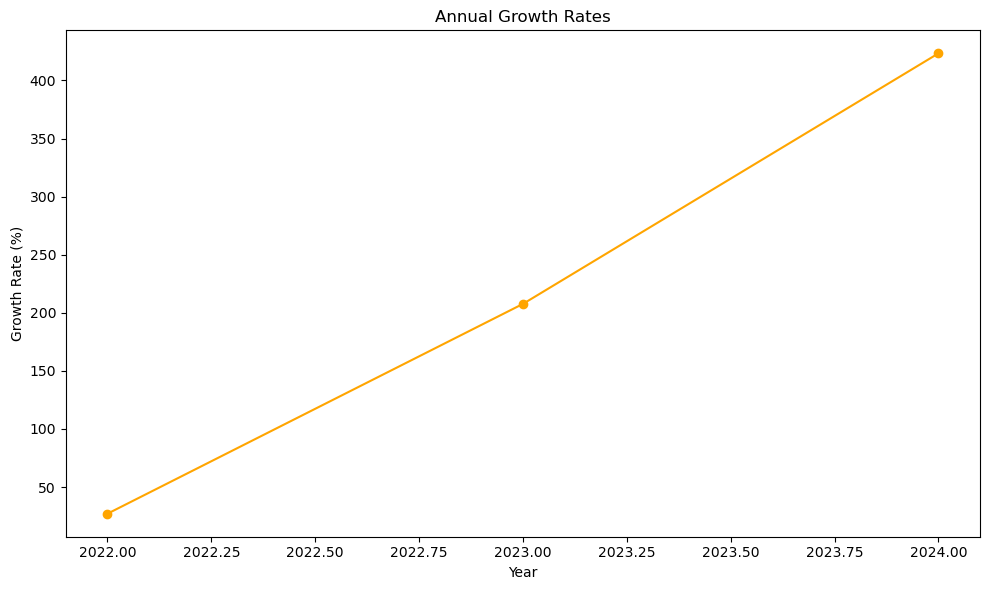

In [6]:
# Calculate annual growth rates
yearly_cash_flow['growth_rate'] = yearly_cash_flow['cash_flow'].pct_change() * 100

# Plot average growth rates
plt.figure(figsize=(10, 6))
plt.plot(yearly_cash_flow["year"], yearly_cash_flow["growth_rate"], marker='o', linestyle='-', color='orange')
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Annual Growth Rates")
plt.tight_layout()
plt.show()
